In [1]:
import os
import glob
import torch
import numpy as np

import albumentations
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

import config
import dataset
import engine
from model import CaptchaModel


In [2]:

image_files = glob.glob(os.path.join(config.DATA_DIR, "*.png"))
# print(image_files)
targets_orig = [x.split("/")[-1][:-4] for x in image_files]
targets_orig = [x.split("\\")[-1][:-4] for x in image_files]
print(targets_orig)
targets = [[c for c in x] for x in targets_orig]
targets_flat = [c for clist in targets for c in clist]

lbl_enc = preprocessing.LabelEncoder()
lbl_enc.fit(targets_flat)
print(targets_flat)
targets_enc = [lbl_enc.transform(x) for x in targets]
targets_enc = np.array(targets_enc)
targets_enc = targets_enc + 1

(
    train_imgs,
    test_imgs,
    train_targets,
    test_targets,
    _,
    test_targets_orig,
) = model_selection.train_test_split(
    image_files, targets_enc, targets_orig, test_size=0.1, random_state=42
)

train_dataset = dataset.ClassificationDataset(
    image_paths=train_imgs,
    targets=train_targets,
    resize=(config.IMAGE_HEIGHT, config.IMAGE_WIDTH),
)


['226md', '22d5n', '2356g', '23mdg', '23n88', '243mm', '244e2', '245y5', '24f6w', '24pew', '25257', '253dc', '25egp', '25m6p', '25p2m', '25w53', '264m5', '268g2', '28348', '28x47', '2b827', '2bg48', '2cegf', '2cg58', '2cgyx', '2en7g', '2enf4', '2fxgd', '2g783', '2g7nm', '2gyb6', '2mg87', '2mpnn', '2n73f', '2nbcx', '2nf26', '2npg6', '2nx38', '2p2y8', '2pfpn', '2w4y7', '2wc38', '2wx73', '2x7bm', '2xc2n', '2ycn8', '2yggg', '325fb', '32cnn', '32dnn', '33b22', '33f7m', '33n73', '33ng4', '33p4e', '34b84', '34fxm', '34pcn', '368y5', '36bc2', '36nx4', '36w25', '373gb', '377xx', '378e5', '37d52', '37ep6', '387g2', '38n57', '3b4we', '3bd8f', '3bfnd', '3bnyf', '3bx86', '3cpwb', '3d7bd', '3den6', '3dgmf', '3ebnn', '3ebpw', '3eny7', '3fbxd', '3g2w6', '3mxdn', '3n2b4', '3n3cf', '3n7mx', '3ndxd', '3nfdn', '3nnpw', '3nw7w', '3ny45', '3p4nn', '3p67n', '3pe4g', '3w2bw', '3wnd3', '3x325', '3x5fm', '3xcgg', '3xng6', '3ye2e', '3ygde', '3ym7f', '428b6', '42dw4', '42nxy', '42xpy', '43gey', '43mn5', '43p5d', 

In [3]:
print(train_dataset[0])

{'images': tensor([[[1.1700, 1.1700, 1.1700,  ..., 2.1804, 2.1804, 2.1804],
         [1.1700, 1.1700, 1.1700,  ..., 2.1804, 2.1804, 2.1804],
         [1.1700, 1.1700, 1.1700,  ..., 2.1804, 2.1804, 2.1804],
         ...,
         [1.2214, 1.2214, 1.2214,  ..., 2.2318, 2.2318, 2.2318],
         [1.2214, 1.2214, 1.2214,  ..., 2.2318, 2.2318, 2.2318],
         [1.2214, 1.2214, 1.2214,  ..., 2.2318, 2.2318, 2.2318]],

        [[1.3256, 1.3256, 1.3256,  ..., 2.3585, 2.3585, 2.3585],
         [1.3256, 1.3256, 1.3256,  ..., 2.3585, 2.3585, 2.3585],
         [1.3256, 1.3256, 1.3256,  ..., 2.3585, 2.3585, 2.3585],
         ...,
         [1.3782, 1.3782, 1.3782,  ..., 2.4111, 2.4111, 2.4111],
         [1.3782, 1.3782, 1.3782,  ..., 2.4111, 2.4111, 2.4111],
         [1.3782, 1.3782, 1.3782,  ..., 2.4111, 2.4111, 2.4111]],

        [[1.5420, 1.5420, 1.5420,  ..., 2.5703, 2.5703, 2.5703],
         [1.5420, 1.5420, 1.5420,  ..., 2.5703, 2.5703, 2.5703],
         [1.5420, 1.5420, 1.5420,  ..., 2.5703,

In [15]:
npimg = train_dataset[25]["images"].numpy()
print(npimg)

[[[1.1700487 1.1700487 1.1700487 ... 2.1804092 2.1804092 2.1804092]
  [1.1700487 1.1700487 1.1700487 ... 2.1804092 2.1804092 2.1804092]
  [1.1700487 1.1700487 1.1700487 ... 2.1804092 2.1804092 2.1804092]
  ...
  [1.221423  1.221423  1.221423  ... 2.2317834 2.2317834 2.2317834]
  [1.221423  1.221423  1.221423  ... 2.2317834 2.2317834 2.2317834]
  [1.221423  1.221423  1.221423  ... 2.2317834 2.2317834 2.2317834]]

 [[1.3256302 1.3256302 1.3256302 ... 2.3585434 2.3585434 2.3585434]
  [1.3256302 1.3256302 1.3256302 ... 2.3585434 2.3585434 2.3585434]
  [1.3256302 1.3256302 1.3256302 ... 2.3585434 2.3585434 2.3585434]
  ...
  [1.3781512 1.3781512 1.3781512 ... 2.4110644 2.4110644 2.4110644]
  [1.3781512 1.3781512 1.3781512 ... 2.4110644 2.4110644 2.4110644]
  [1.3781512 1.3781512 1.3781512 ... 2.4110644 2.4110644 2.4110644]]

 [[1.5419607 1.5419607 1.5419607 ... 2.5702832 2.5702832 2.5702832]
  [1.5419607 1.5419607 1.5419607 ... 2.5702832 2.5702832 2.5702832]
  [1.5419607 1.5419607 1.5419607

In [16]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


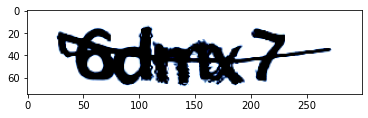

In [17]:
plt.imshow(np.transpose(npimg , (1,2,0)))